In [1]:
import pandas as pd
import requests as req
from citipy import citipy 
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time as time
key="24043e8bb648aaf36a5c9508ba941c0a"

In [2]:
#create list of random latitudes and longitudes
data= pd.DataFrame(columns =['Lat',"Lng","City","Temperature","Humidity","Clouds","Wind Speed"])
lat = []
lng = []
for x in range(0,500):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
data['Lat']=lat
data['Lng']=lng
data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,33.132395,161.747141,NaN,NaN,NaN,NaN,NaN
1,42.754294,-29.423470,NaN,NaN,NaN,NaN,NaN
2,26.915844,106.399785,NaN,NaN,NaN,NaN,NaN
3,-36.507150,140.460682,NaN,NaN,NaN,NaN,NaN
4,29.349626,-11.441645,NaN,NaN,NaN,NaN,NaN


In [3]:
#find cities related to coordinates
cities = []
for index, row in data.iterrows():
    city=citipy.nearest_city(row["Lat"],row["Lng"])
    cities.append(city.city_name)
data['City']=cities
data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,33.132395,161.747141,sentyabrskiy,NaN,NaN,NaN,NaN
1,42.754294,-29.423470,lagoa,NaN,NaN,NaN,NaN
2,26.915844,106.399785,guiyang,NaN,NaN,NaN,NaN
3,-36.507150,140.460682,mount gambier,NaN,NaN,NaN,NaN
4,29.349626,-11.441645,tiznit,NaN,NaN,NaN,NaN


In [5]:
#check for and remove duplicates and make sure there are atleast 500 unique cities to test
new_data = data.drop_duplicates("City",keep="first")
len(new_data)

276

In [6]:
temp=[]
humidity =[]
clouds = []
wind = []

counter = 0
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#iterate through the rows to pull data from the api 
try:
    for index, row in new_data.iterrows():
        counter +=1
        city = row["City"]
        target_url = url+"lat="+str(row["Lat"])+"&lon="+str(row["Lng"])+"&appid="+key+"&units="+units
        print("we are now on city number "+str(counter))
        print("The name of the city is "+row["City"])
        print(target_url)
        print("__________________________________________________________________________________________")
        info = req.get(target_url).json()
        temp.append(info['main']['temp'])
        humidity.append(info['main']['humidity'])
        clouds.append(info['clouds']['all'])
        wind.append(info['wind']['speed'])
        time.sleep(1)
except:
    pass
#assign the values from the arrays to the data frame
new_data["Temperature"]=temp
new_data["Humidity"]=humidity
new_data["Clouds"]=clouds
new_data["Wind Speed"]=wind


we are now on city number 1
The name of the city is sentyabrskiy
https://api.openweathermap.org/data/2.5/weather?lat=33.1323947933013&lon=161.7471413460206&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 2
The name of the city is lagoa
https://api.openweathermap.org/data/2.5/weather?lat=42.754293743874825&lon=-29.423469876481875&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 3
The name of the city is guiyang
https://api.openweathermap.org/data/2.5/weather?lat=26.915844179789445&lon=106.39978538086848&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 4
The name of the city is mount gambier
https://api.openweathermap.org/data/

we are now on city number 29
The name of the city is tasiilaq
https://api.openweathermap.org/data/2.5/weather?lat=75.78298104067258&lon=-38.03178629741953&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 30
The name of the city is jamestown
https://api.openweathermap.org/data/2.5/weather?lat=-11.250545630126638&lon=0.5409038460489342&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 31
The name of the city is belushya guba
https://api.openweathermap.org/data/2.5/weather?lat=82.76028802530922&lon=56.41541631453862&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 32
The name of the city is itubera
https://api.openweathermap.org/d

we are now on city number 57
The name of the city is rena
https://api.openweathermap.org/data/2.5/weather?lat=61.27367900177927&lon=11.157199230658591&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 58
The name of the city is grand river south east
https://api.openweathermap.org/data/2.5/weather?lat=-22.977323310140093&lon=68.22064592936619&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 59
The name of the city is kutum
https://api.openweathermap.org/data/2.5/weather?lat=17.148408884861112&lon=23.08642946950161&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 60
The name of the city is baie-comeau
https://api.openweathermap.

we are now on city number 85
The name of the city is atbasar
https://api.openweathermap.org/data/2.5/weather?lat=51.077390294431126&lon=68.81172165428868&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 86
The name of the city is gasa
https://api.openweathermap.org/data/2.5/weather?lat=28.037546782838874&lon=89.98888538071884&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 87
The name of the city is harper
https://api.openweathermap.org/data/2.5/weather?lat=0.6508415281163877&lon=-8.017987976530833&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 88
The name of the city is requena
https://api.openweathermap.org/data/2.5/weath

we are now on city number 113
The name of the city is kodiak
https://api.openweathermap.org/data/2.5/weather?lat=48.570107159461145&lon=-150.57928941827305&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 114
The name of the city is verkhnyaya inta
https://api.openweathermap.org/data/2.5/weather?lat=64.14016227516095&lon=60.55125530014962&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 115
The name of the city is shimoda
https://api.openweathermap.org/data/2.5/weather?lat=28.43104498320696&lon=140.93124388859962&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 116
The name of the city is hurricane
https://api.openweathermap.o

we are now on city number 141
The name of the city is ilulissat
https://api.openweathermap.org/data/2.5/weather?lat=72.55246982599022&lon=-45.266102888496334&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 142
The name of the city is maldonado
https://api.openweathermap.org/data/2.5/weather?lat=-37.57828702683875&lon=-53.900709379090586&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 143
The name of the city is bluff
https://api.openweathermap.org/data/2.5/weather?lat=-69.72535188234023&lon=168.08972759559902&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 144
The name of the city is kyra
https://api.openweathermap.org/data

we are now on city number 169
The name of the city is skagastrond
https://api.openweathermap.org/data/2.5/weather?lat=67.71435995979706&lon=-21.46371734362134&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 170
The name of the city is prince rupert
https://api.openweathermap.org/data/2.5/weather?lat=54.108454900713184&lon=-131.44413847204035&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 171
The name of the city is muchkapskiy
https://api.openweathermap.org/data/2.5/weather?lat=51.8243956786923&lon=42.56167003372775&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 172
The name of the city is kununurra
https://api.openweathe

we are now on city number 197
The name of the city is letterkenny
https://api.openweathermap.org/data/2.5/weather?lat=54.97241567867249&lon=-7.795603339997058&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 198
The name of the city is caravelas
https://api.openweathermap.org/data/2.5/weather?lat=-23.897033009819438&lon=-23.505633439152632&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 199
The name of the city is ixtapa
https://api.openweathermap.org/data/2.5/weather?lat=1.9234371178771994&lon=-109.34826369310417&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 200
The name of the city is grindavik
https://api.openweathermap

we are now on city number 224
The name of the city is viedma
https://api.openweathermap.org/data/2.5/weather?lat=-45.12640713213797&lon=-58.99026548380206&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 225
The name of the city is ginda
https://api.openweathermap.org/data/2.5/weather?lat=15.082116678600869&lon=39.49767463203844&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 226
The name of the city is mwinilunga
https://api.openweathermap.org/data/2.5/weather?lat=-11.864147754252897&lon=25.092165895361717&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 227
The name of the city is taltal
https://api.openweathermap.org/data/

we are now on city number 252
The name of the city is porto-vecchio
https://api.openweathermap.org/data/2.5/weather?lat=41.696625108291954&lon=9.713317975599011&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 253
The name of the city is knokke-heist
https://api.openweathermap.org/data/2.5/weather?lat=52.40335011356839&lon=2.9784659888065903&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 254
The name of the city is fairbanks
https://api.openweathermap.org/data/2.5/weather?lat=65.46997404912375&lon=-145.9869053232616&appid=24043e8bb648aaf36a5c9508ba941c0a&units=imperial
__________________________________________________________________________________________
we are now on city number 255
The name of the city is yantal
https://api.openweathermap

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [32]:
new_data

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,14.890485,-14.678554,linguere,90.22,20,0,15.14
1,-0.783431,-84.501639,manta,72.27,100,0,15.82
2,-18.855919,-50.320882,santa vitoria,78.16,89,88,14.58
3,-40.333283,-159.752465,avarua,60.43,100,64,14.03
4,70.863795,-60.205153,upernavik,-6.04,87,36,10.67
5,-64.251336,163.383157,bluff,31.32,94,80,13.80
6,-45.503653,-46.701442,mar del plata,50.53,100,92,12.91
7,23.908445,-43.451281,bathsheba,75.51,98,88,18.05
8,47.219434,37.574408,staryy krym,32.40,89,44,11.68
9,33.741871,174.450852,nikolskoye,66.51,100,44,29.01


In [7]:
new_data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,33.132395,161.747141,sentyabrskiy,56.56,100,68,25.90
1,42.754294,-29.423470,lagoa,61.24,96,88,26.02
2,26.915844,106.399785,guiyang,26.60,100,90,6.71
3,-36.507150,140.460682,mount gambier,68.71,79,12,2.75
4,29.349626,-11.441645,tiznit,61.78,100,0,34.29


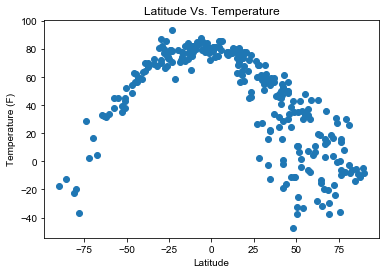

In [8]:
#Latitude Vs Temperature 
plt.scatter(new_data["Lat"],new_data["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()

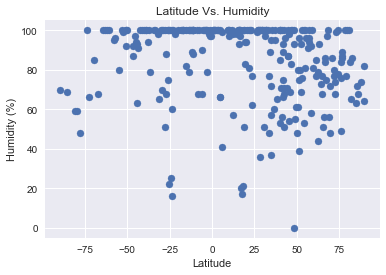

In [9]:
#Humidity Vs. Latitude
plt.scatter(new_data["Lat"],new_data["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.show()

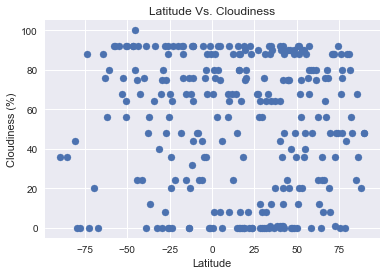

In [10]:
#Cloudiness Vs. Latitude 
plt.scatter(new_data["Lat"],new_data["Clouds"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

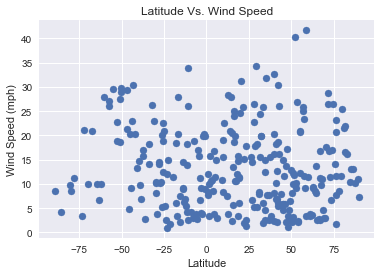

In [11]:
#Wind Speed Vs. Latitude
plt.scatter(new_data["Lat"],new_data["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()